<a href="https://colab.research.google.com/github/Sajjat-Hossain/ML_Project/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

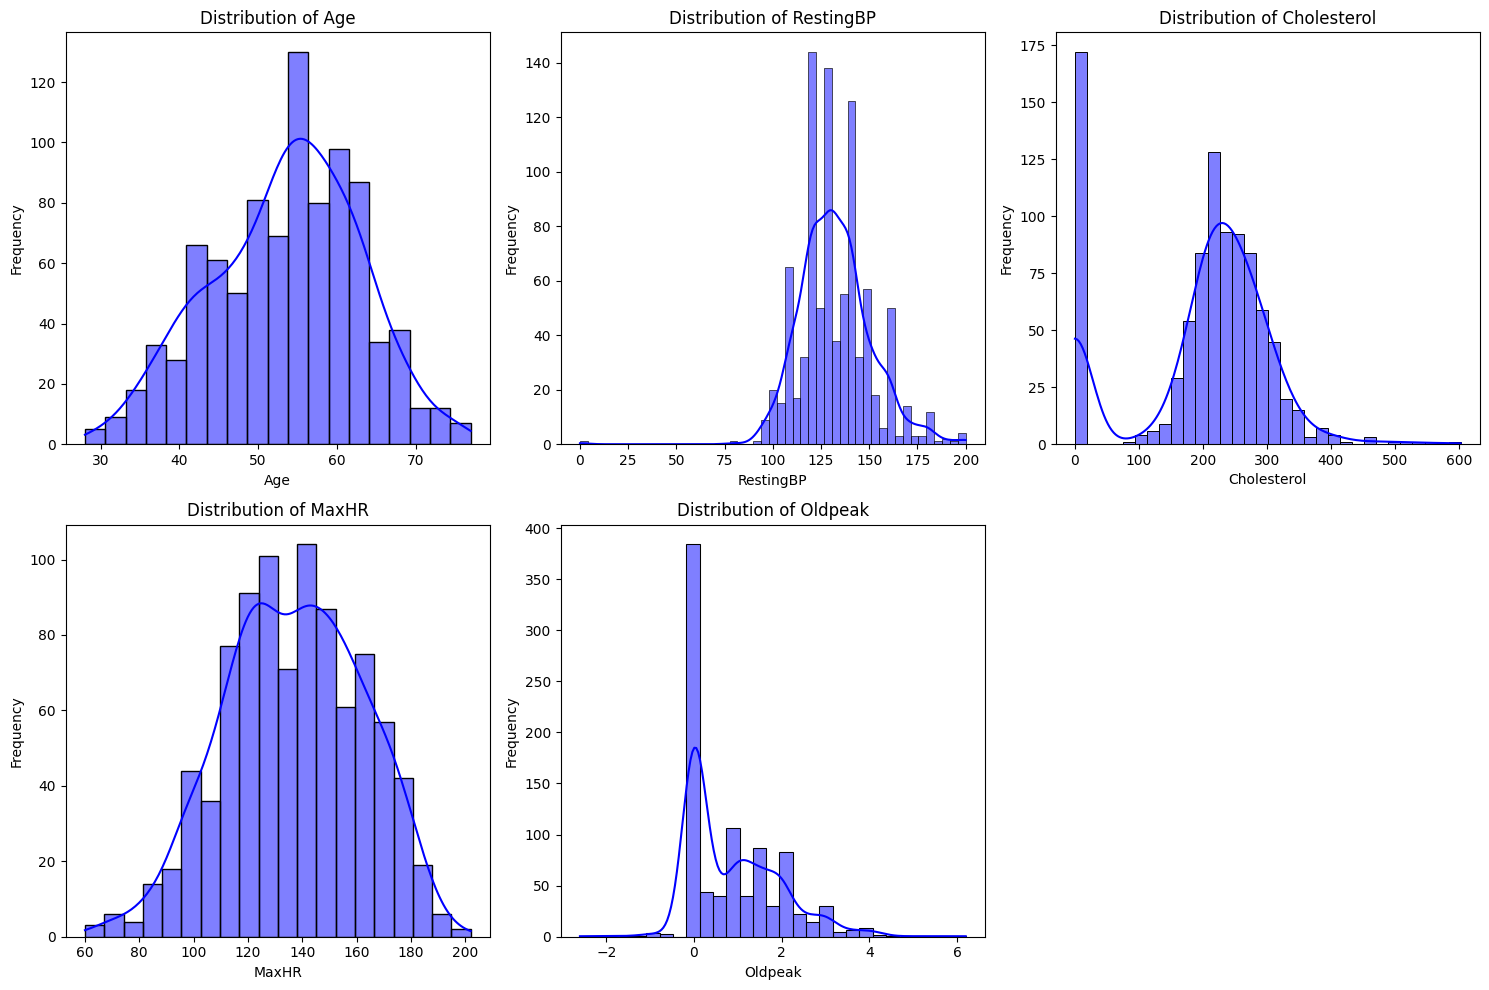

<ipython-input-5-1b694546ccb4>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='HeartDisease', palette='coolwarm')


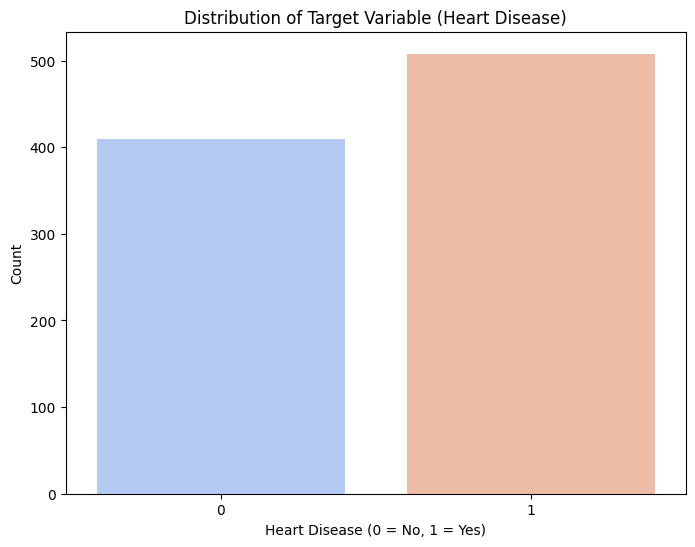

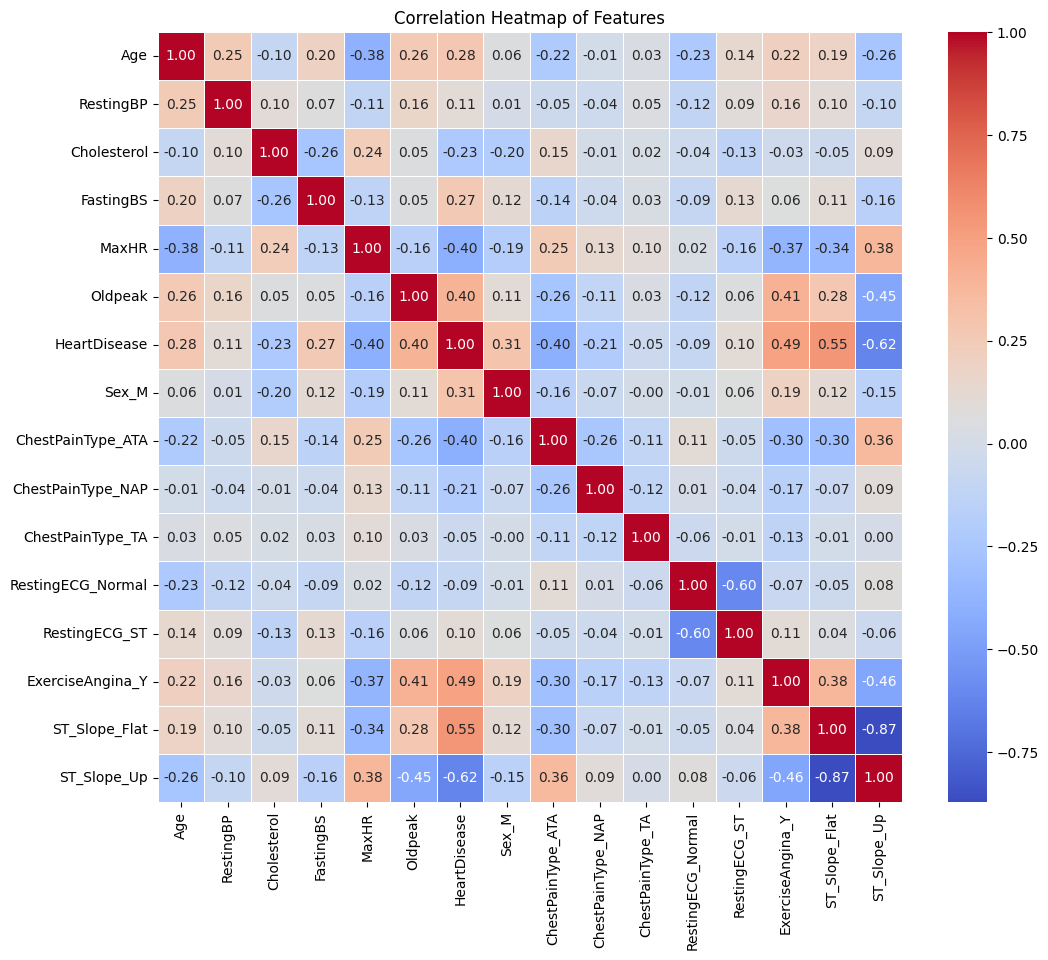

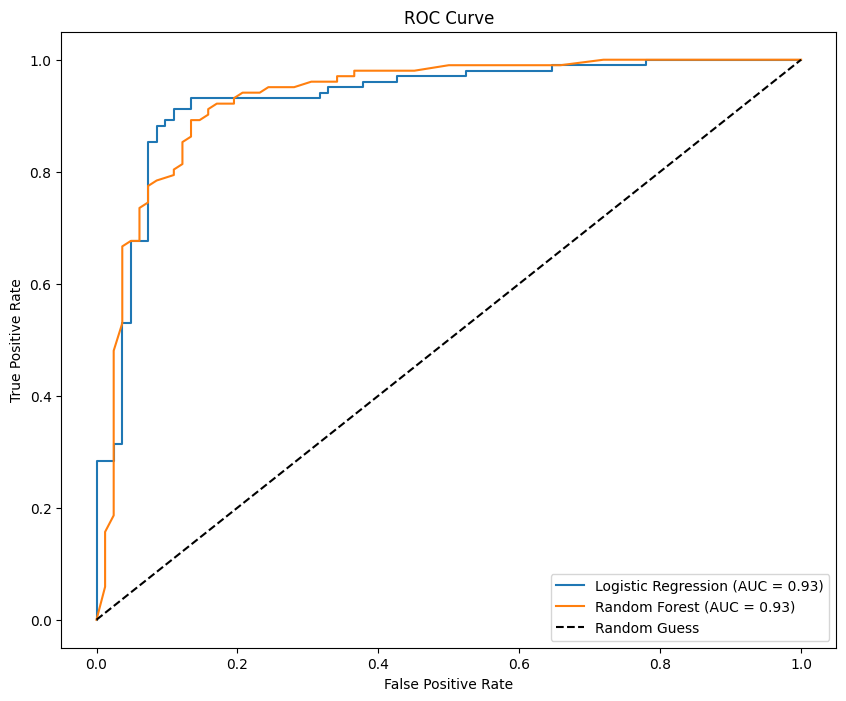

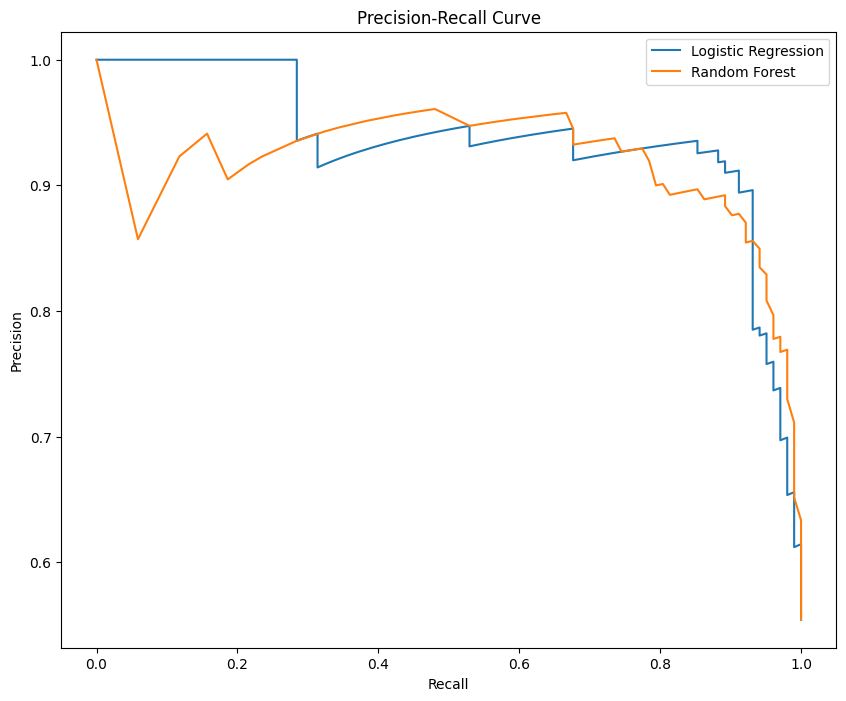

<ipython-input-5-1b694546ccb4>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


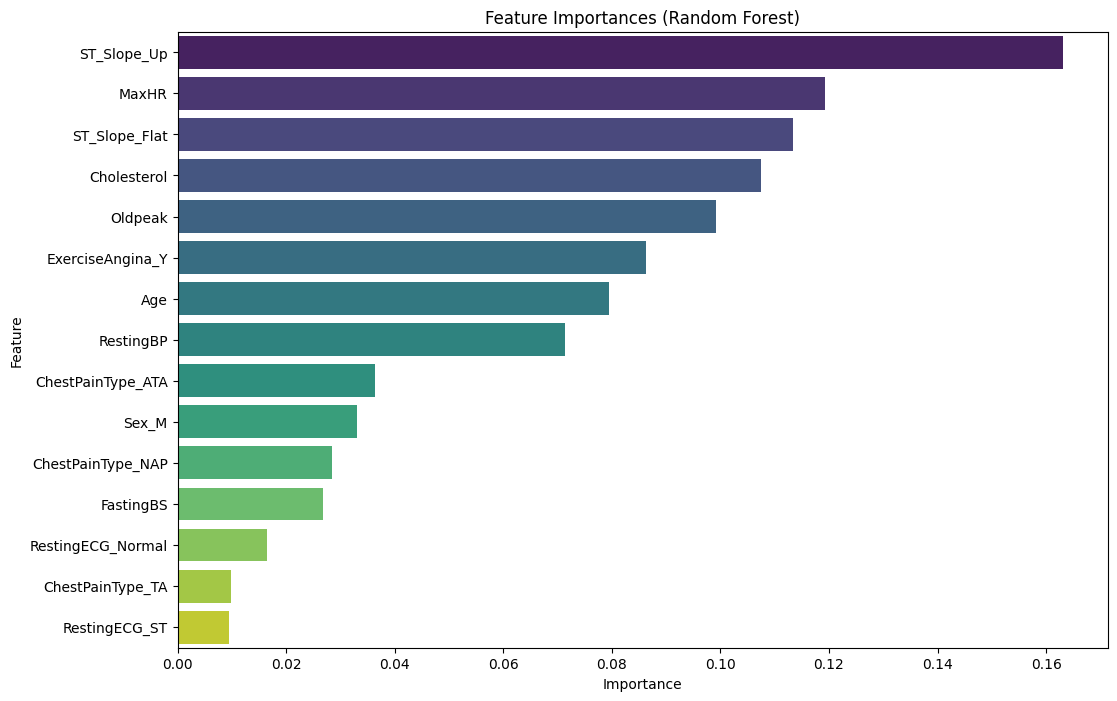

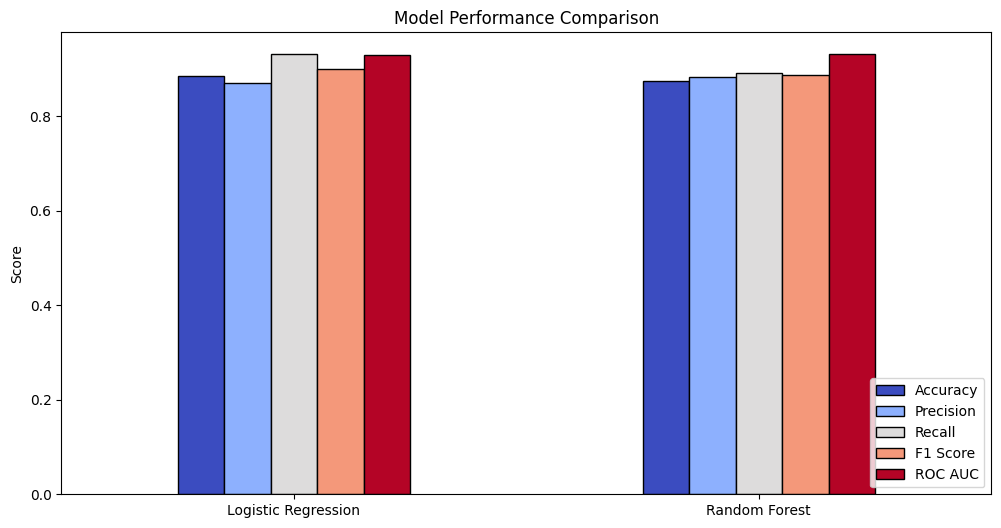


Confusion Matrices:
Logistic Regression:
[[68 14]
 [ 7 95]]

Random Forest:
[[70 12]
 [11 91]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Model Accuracy:
Logistic Regression: 0.89
Random Forest: 0.88


<ipython-input-5-1b694546ccb4>:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm', edgecolor='black')


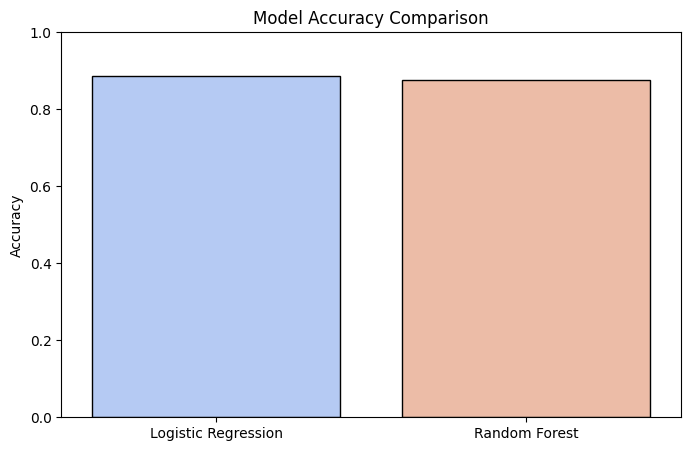


Provide the following details for prediction:


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

# Preprocessing
# Encoding categorical variables
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Splitting data into features and target
X = data_encoded.drop(columns=['HeartDisease'])
y = data_encoded['HeartDisease']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_lr = logistic_model.predict(X_test_scaled)
y_prob_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Data distribution for numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 1. Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HeartDisease', palette='coolwarm')
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# 3. ROC Curve
plt.figure(figsize=(10, 8))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
plt.figure(figsize=(10, 8))
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
plt.plot(recall_lr, precision_lr, label="Logistic Regression")

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall_rf, precision_rf, label="Random Forest")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# 5. Extended Feature Importance (Random Forest)
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Metrics for comparison
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)],
    "ROC AUC": [roc_auc_score(y_test, y_prob_lr), roc_auc_score(y_test, y_prob_rf)]
}

metrics_df = pd.DataFrame(metrics, index=["Logistic Regression", "Random Forest"])
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', edgecolor='black')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Confusion Matrices
print("\nConfusion Matrices:")
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nRandom Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Reports
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


# Logistic Regression Predictions
y_pred_lr = logistic_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest Predictions
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the Accuracy
print("Model Accuracy:")
print(f"Logistic Regression: {accuracy_lr:.2f}")
print(f"Random Forest: {accuracy_rf:.2f}")

# Visualizing Accuracy Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_lr, accuracy_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='coolwarm', edgecolor='black')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# User Input and Prediction
def get_user_input():
    print("\nProvide the following details for prediction:")
    input_data = {
        'Age': float(input("Age: ")),
        'RestingBP': float(input("Resting Blood Pressure (mmHg): ")),
        'Cholesterol': float(input("Cholesterol (mg/dL): ")),
        'FastingBS': int(input("Fasting Blood Sugar (>120 mg/dL, 1/0): ")),
        'MaxHR': float(input("Maximum Heart Rate Achieved: ")),
        'Oldpeak': float(input("Oldpeak ST Depression Induced by Exercise (Float Data): ")),
        'Sex_M': int(input("Sex (Male=1, Female=0): ")),
        'ChestPainType_ATA': int(input("Chest Pain Type (ATA=1, else=0): ")),
        'ChestPainType_NAP': int(input("Chest Pain Type (NAP=1, else=0): ")),
        'ChestPainType_TA': int(input("Chest Pain Type (TA=1, else=0): ")),
        'RestingECG_Normal': int(input("Resting ECG (Normal=1, else=0): ")),
        'RestingECG_ST': int(input("Resting ECG (ST=1, else=0): ")),
        'ExerciseAngina_Y': int(input("Exercise-Induced Angina (Yes=1, No=0): ")),
        'ST_Slope_Flat': int(input("ST Slope (Flat=1, else=0): ")),
        'ST_Slope_Up': int(input("ST Slope (Up=1, else=0): "))
    }
    return pd.DataFrame([input_data])

user_input = get_user_input()
user_input = user_input.reindex(columns=X.columns, fill_value=0)
user_input_scaled = scaler.transform(user_input)

lr_prediction = logistic_model.predict(user_input_scaled)
rf_prediction = random_forest_model.predict(user_input)

print("\nPredictions:")
print(f"Logistic Regression Prediction (Heart Disease: 1/0): {lr_prediction[0]}")
print(f"Random Forest Prediction (Heart Disease: 1/0): {rf_prediction[0]}")

